In [2]:
import requests
import os
import sys
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')
from utils.eia_api import EIADataPuller 

load_dotenv()

True

In [4]:
from utils.custom_types import FuelType, Respondent


data_puller = EIADataPuller()
data = data_puller.get_power_gen_data(FuelType.NATURAL_GAS, Respondent.PJM)

Querying 2414 rows of data...


In [16]:
df = pd.DataFrame(data)
df = df.sort_values(by='period').reset_index(drop=True)

df['value'] = df['value'].astype(int)
df['period'] = pd.to_datetime(df['period'])
df['year'] = df['period'].dt.year
df['week'] = df['period'].dt.strftime("%U").astype(int)
df[df['year'] == 2024]

,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units,year,week
1826,2024-01-01,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,971059,megawatthours,2024,0
1827,2024-01-02,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,1030914,megawatthours,2024,0
1828,2024-01-03,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,1117001,megawatthours,2024,0
1829,2024-01-04,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,1144354,megawatthours,2024,0
1830,2024-01-05,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,1146211,megawatthours,2024,0
...,...,...,...,...,...,...,...,...,...,...,...
2187,2024-12-27,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,958653,megawatthours,2024,51
2188,2024-12-28,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,882875,megawatthours,2024,51
2189,2024-12-29,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,781444,megawatthours,2024,52
2190,2024-12-30,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,856389,megawatthours,2024,52


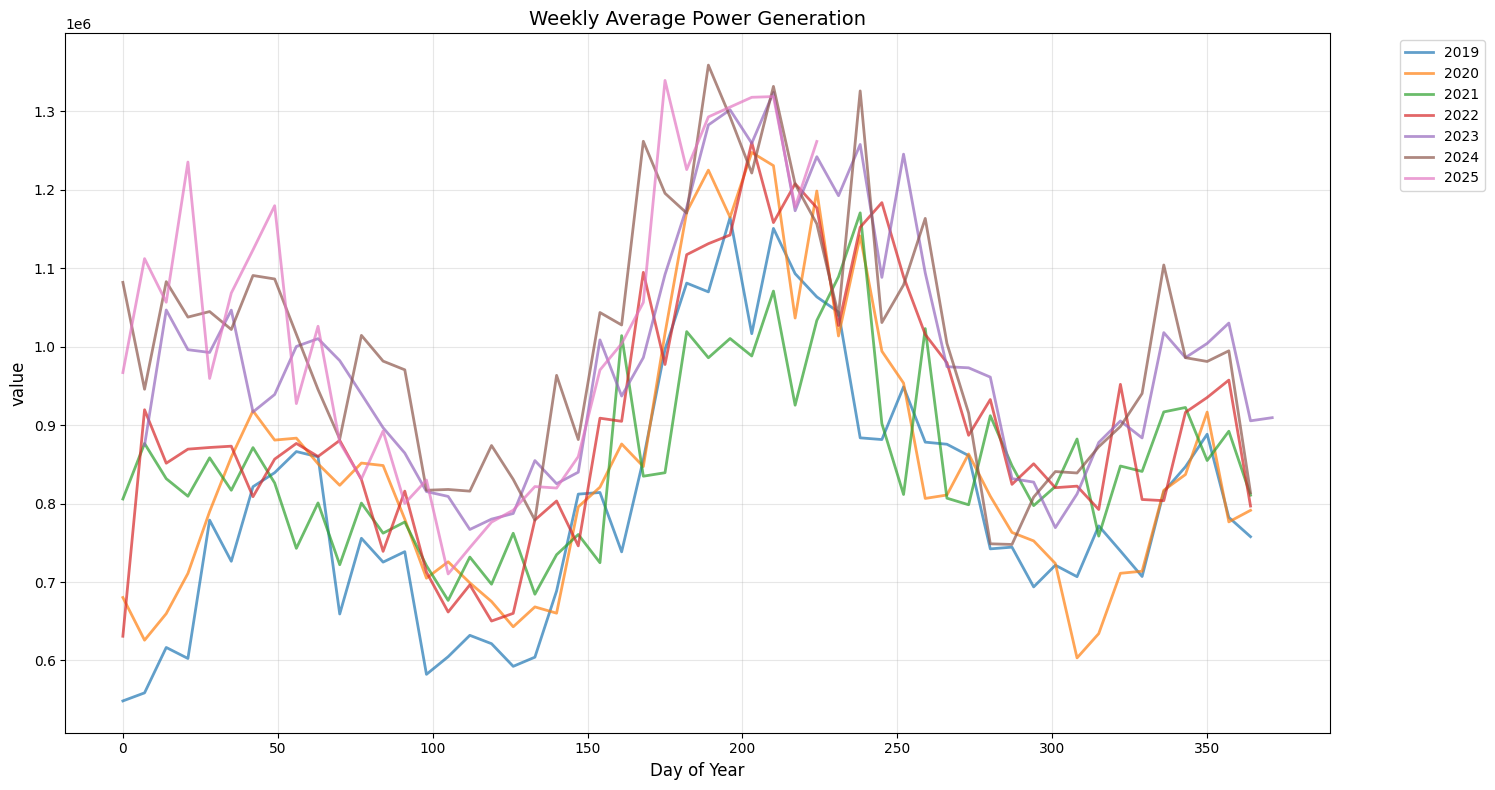

In [17]:
from utils.plots import EDAPlots
weekly_agg = (df.groupby(['year', 'week'])
    ['value'].agg("mean")
    .reset_index()
    .rename(columns={'year': 'Year'})
)

weekly_agg['DayOfYear'] = weekly_agg['week'] * 7

EDAPlots.generate_year_plot(weekly_agg, 'value', 'Weekly Average Power Generation')


# weekly_agg['days_since'] = (weekly_agg['year'] - 2019) * 365 + (weekly_agg['week'] - 1) * 7
# plt.plot(weekly_agg['days_since'], weekly_agg['value'])
